0.006962163514067754


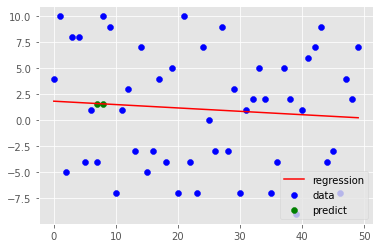

In [36]:
from statistics import mean
import numpy as np
import random

def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    y = []
    for i in range(hm):
        v = val + random.randrange(-variance, variance)
        y.append(v)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    x = [i for i in range(hm)]
    
    return np.array(x, dtype = np.float64), np.array(y, dtype = np.float64)

def linear_slope_and_intercept(x, y):
    m = mean(x) * mean(y) - mean(x * y)
    m /= mean(x) ** 2 - mean(x ** 2)
    
    b = mean(y) - m * mean(x)
    
    return m, b

def squared_error(y_orig, y_line):
    return sum((y_line - y_orig) ** 2)

def coefficient_of_determination(y_orig, y_regr):
    y_mean = [mean(y_orig) for _ in y_orig]
    sqrd_err_regr = squared_error(y_orig, y_regr)
    sqrd_err_mean = squared_error(y_orig, y_mean)
    
    return 1 - sqrd_err_regr / sqrd_err_mean

x, y = create_dataset(50, 10, 2, correlation = False)

m, b = linear_slope_and_intercept(x, y)

regression_line = [m * i + b for i in x]

r_sqrd = coefficient_of_determination(y, regression_line)

print(r_sqrd)

predict_x = np.array([7, 8], dtype=np.float64)
predict_y = (m * predict_x) + b

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

plt.scatter(x, y, color = 'blue', label = 'data')
plt.scatter(predict_x, predict_y, color = 'green', label = 'predict')
plt.plot(x, regression_line, color = 'red', label = 'regression')
plt.legend(loc = 4)
plt.show()




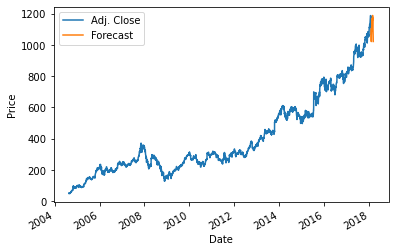

In [29]:
import quandl, math
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

quandl.ApiConfig.api_key = "r1NRrfSThJSzC8SCKsmr"
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#clf = svm.SVR()
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [34]:
import quandl

quandl.ApiConfig.api_key = "r1NRrfSThJSzC8SCKsmr"
df = quandl.get("WIKI/GOOGL", rows=5)

print(df)


               Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                     
2018-03-21  1092.57  1108.70  1087.21  1094.00  1990515.0          0.0   
2018-03-22  1080.01  1083.92  1049.64  1053.15  3418154.0          0.0   
2018-03-23  1051.37  1066.78  1024.87  1026.55  2413517.0          0.0   
2018-03-26  1050.60  1059.27  1010.58  1054.09  3272409.0          0.0   
2018-03-27  1063.90  1064.54   997.62  1006.94  2940957.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0    1092.57    1108.70   1087.21     1094.00   
2018-03-22          1.0    1080.01    1083.92   1049.64     1053.15   
2018-03-23          1.0    1051.37    1066.78   1024.87     1026.55   
2018-03-26          1.0    1050.60    1059.27   1010.58     1054.09   
2018-03-27          1.0    1063.90    1064.54    997.62

In [4]:
import qiskit as q
from qiskit import IBMQ
%matplotlib inline

IBMQ.save_account(open('token.txt', 'r').read())

IBMQ.load_account()

IBMQ.providers()

provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
	try:
		qubit_count = len(backend.properties().qubits)
	except:
		qubit_count = 'simulated'

	print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

from qiskit.tools.monitor import job_monitor

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
#circuit.draw(output='mpl')

backend = provider.get_backend('ibmq_london')
job = q.execute(circuit, backend = backend, shots = 500)

configrc.store_credentials:WARNING:2020-05-01 20:44:58,533: Credentials already present. Set overwrite=True to overwrite.


ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 1 queued and 5 qubits
ibmq_16_melbourne has 2 queued and 15 qubits
ibmq_vigo has 0 queued and 5 qubits
ibmq_ourense has 3 queued and 5 qubits
ibmq_london has 3 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 1 queued and 5 qubits
ibmq_armonk has 3 queued and 1 qubits
ibmq_rome has 0 queued and 5 qubits


In [2]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
#circuit.draw(output='mpl')

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═